<a href="https://colab.research.google.com/github/joromarxx/machine_learning/blob/master/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
   https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0\
   -O /tmp/cats_and_dogs_small.zip

--2020-04-21 21:44:24--  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip [following]
--2020-04-21 21:44:24--  https://www.dropbox.com/s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6f5c2cdb0e509eb1c1b8c8a476.dl.dropboxusercontent.com/cd/0/inline/A2Q8ElKk562tTNMMOvsH6XAb3m4QeVnyK7dt2UsxSYjSjXDBQ1EvBUWyXjAIyBAidusRA6dw1yjm1KDmfjom0yxfvUzh-PfbXrubyIyeXFKwEQT7tywYektX0Dm90BDQMrA/file# [following]
--2020-04-21 21:44:24--  https://uc6f5c2cdb0e509eb1c1b8c8a476.dl.dropboxusercontent.com/cd/0/inline/A2Q8ElKk562tTNMMOvsH6XAb3m4QeVnyK7dt2UsxSYjSjXDBQ1EvBUWyXjAIyBAidusRA6dw1yjm

In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_small.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print(validation_dog_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print(test_dog_fnames[:5])

['cat.381.jpg', 'cat.497.jpg', 'cat.789.jpg', 'cat.533.jpg', 'cat.612.jpg']
['dog.513.jpg', 'dog.338.jpg', 'dog.629.jpg', 'dog.44.jpg', 'dog.958.jpg']
['cat.1240.jpg', 'cat.1410.jpg', 'cat.1263.jpg', 'cat.1159.jpg', 'cat.1444.jpg']
['dog.1366.jpg', 'dog.1487.jpg', 'dog.1215.jpg', 'dog.1029.jpg', 'dog.1140.jpg']
['cat.1506.jpg', 'cat.1901.jpg', 'cat.1508.jpg', 'cat.1758.jpg', 'cat.1696.jpg']
['dog.1943.jpg', 'dog.1542.jpg', 'dog.1869.jpg', 'dog.1621.jpg', 'dog.1513.jpg']


In [6]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500


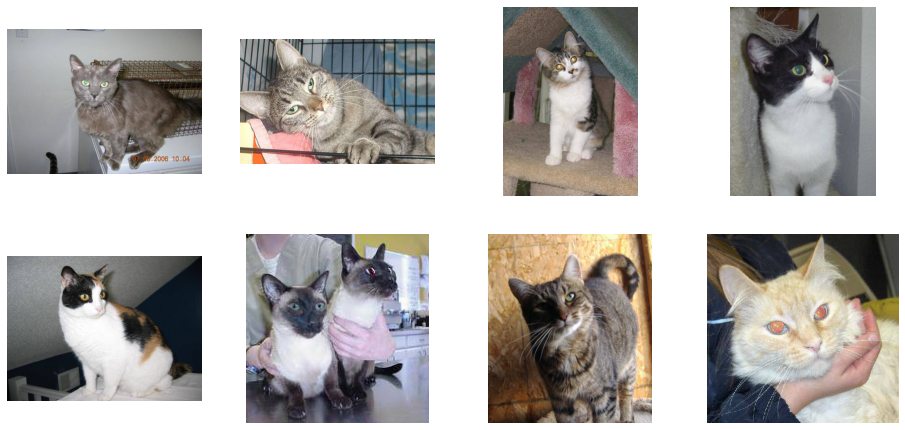

In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
]

for i, img_path in enumerate(next_cat_pix):
   sp = plt.subplot(nrows, ncols, i + 1)
   sp.axis('Off') # no imprimir ejes
   img = mpimg.imread(img_path)
   plt.imshow(img)

plt.show()

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
   loss='binary_crossentropy',
   metrics = ['acc']
   )

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [12]:
train_generator = train_datagen.flow_from_directory(train_dir,
                  batch_size=20,
                  class_mode='binary',
                  target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                  batch_size=20,
                  class_mode = 'binary',
                  target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(validation_dir,
                  batch_size=20,
                  class_mode = 'binary',
                  target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

100
50


In [14]:
history = model.fit_generator(
             train_generator,
             steps_per_epoch= steps_per_epoch,
             epochs=100,
             validation_data=validation_generator,
             validation_steps= validation_steps,
             verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 - 102s - loss: 0.6892 - acc: 0.5410 - val_loss: 0.6838 - val_acc: 0.5040
Epoch 2/100


KeyboardInterrupt: ignored